In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob

In [3]:
grid=xr.open_dataset("C:/Users/Megan Jeffers/Documents/Honours/data/seqld_1km_grd.nc")
grid
bathy=xr.open_dataset('C:/Users/Megan Jeffers/Documents/Honours/data/gebco_2023_n-10.0_s-44.0_w145.0_e165.0.nc')
bathy

<xarray.Dataset>
Dimensions:    (lat: 8160, lon: 4800)
Coordinates:
  * lat        (lat) float64 -44.0 -43.99 -43.99 -43.99 ... -10.01 -10.01 -10.0
  * lon        (lon) float64 145.0 145.0 145.0 145.0 ... 165.0 165.0 165.0 165.0
Data variables:
    elevation  (lat, lon) int16 ...
Attributes: (12/36)
    title:                           The GEBCO_2023 Grid - a continuous terra...
    summary:                         The GEBCO_2023 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    references:                      DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    node_offset:                     1.0

Plot the grid

<Figure size 640x480 with 0 Axes>

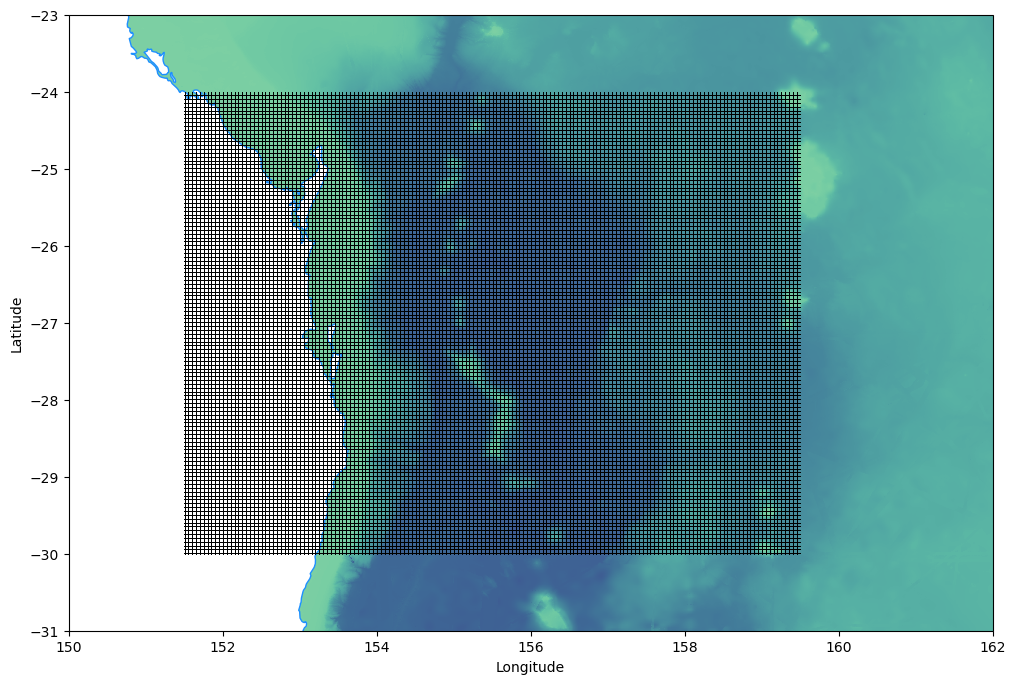

In [3]:
lon=grid.lon_rho.isel(eta_rho=range(0,600,5),xi_rho=range(0,800,5))
lat=grid.lat_rho.isel(eta_rho=range(0,600,5),xi_rho=range(0,800,5))

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[12.3,8])
ax = None

ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
ax.set_extent([150, 161, -31, -23])
Coast = cfeature.NaturalEarthFeature(category='physical',scale='10m',facecolor='none', name='coastline')
feature = ax.add_feature(Coast, edgecolor='dodgerblue',facecolor='white')
im = ax.pcolormesh(bathy.lon,bathy.lat,bathy.elevation,cmap='cmo.deep_r')
#fig.rcParams['contour.negative_linestyle'] = 'solid'
#conlines=ax.contour(bathy.lon,bathy.lat,bathy.elevation,levels=np.arange(-4000,-50,100),colors='k',linewidths=.5,linestyles='solid')
#add on grid with lon_rho and lat_rho
gridlon=ax.vlines(lon,ymin=-30, ymax=-24,linewidth=0.5,color='k')
gridlat=ax.hlines(lat,xmin=151.5, xmax=159.5,linewidth=0.5,color='k')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())


In [11]:
bathy=bathy.sel(lat=slice(-31,-23),lon=slice(151.5,157.5))

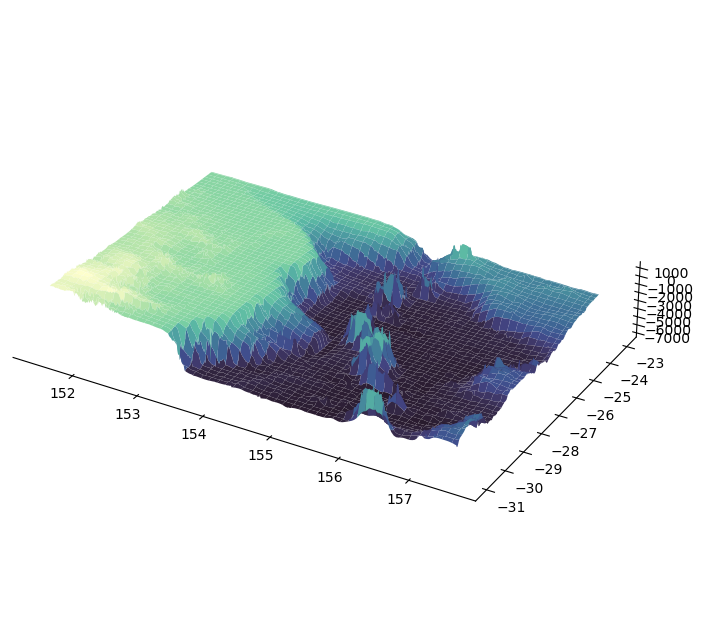

In [12]:
latitude = bathy['lat'].values
longitude = bathy['lon'].values
elevation = bathy['elevation'].values  # Assuming elevation is a variable in your dataset

# Create meshgrid of latitude and longitude
lon_grid, lat_grid = np.meshgrid(longitude, latitude)

# Create 3D plot
fig = plt.figure(figsize=[20,8])
ax = fig.add_subplot(111, projection='3d')

# Plot the terrain surface
surf = ax.plot_surface(lon_grid, lat_grid, elevation, cmap='cmo.deep_r')
surf2 = ax.plot_surface(lon_grid, lat_grid, elevation, cmap='cmo.deep_r')


ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
ax.grid(False)
ax.set_box_aspect([3, 2, 0.5]) 